<a href="https://colab.research.google.com/github/LSH-LC/datajo/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%A1%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터조 발표 자료

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 데이터 불러오기

In [ ]:
!git clone https://github.com/jiho050718/datajo

Cloning into 'datajo'...
remote: Enumerating objects: 123, done.
remote: Counting objects: 100% (51/51), done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 123 (delta 35), reused 17 (delta 17), pack-reused 72 (from 1)
Receiving objects: 100% (123/123), 7.46 MiB | 9.18 MiB/s, done.
Resolving deltas: 100% (48/48), done.


## CSV 불러와서 일부 출력

In [ ]:
# CSV 파일 불러오기
df = pd.read_csv("datajo/titanic1309.csv")
df.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
660,661,1,1,"Frauenthal, Dr. Henry William",male,50.0,2,0,PC 17611,133.65,NaN,S
551,552,0,2,"Sharp, Mr. Percival James R",male,27.0,0,0,244358,26.00,NaN,S
853,854,1,1,"Lines, Miss. Mary Conover",female,16.0,0,1,PC 17592,39.40,D28,S


## 데이터 프레임으로 저장 후 칼럼 확인

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


## 타이타닉 열(변수) 설명

| 변수명        | 설명                                                         |
| ------------- | ------------------------------------------------------------ |
| `PassengerId` | 승객 고유 번호 (각 사람을 구별하는 ID)                      |
| `Survived`    | 생존 여부 (0 = 사망, 1 = 생존)                               |
| `Pclass`      | 객실 등급 (1 = 1등석, 2 = 2등석, 3 = 3등석)                  |
| `Name`        | 승객 이름 (예: Mr. John Smith)                              |
| `Sex`         | 성별 (`male` = 남자, `female` = 여자)                      |
| `Age`         | 나이 (정수 또는 실수, 일부 결측값 존재)                      |
| `SibSp`       | 함께 탄 형제자매 또는 배우자 수                              |
| `Parch`       | 함께 탄 부모 또는 자녀 수                                   |
| `Ticket`      | 티켓 번호 (탑승권 번호)                                      |
| `Fare`        | 운임 요금 (티켓 가격)                                        |
| `Cabin`       | 선실 번호 (많은 결측값 존재)                                |
| `Embarked`    | 탑승한 항구 (`C`=셰르부르, `Q`=퀸스타운, `S`=사우샘프턴) |

# 결측치

## 결측치 처리

In [ ]:
# 결측치 처리
df['Age'].fillna(df['Age'].median(), inplace=True)  # 나이는 중앙값으로 대체
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)  # 탑승 항구는 최빈값으로 대체
df.drop('Cabin', axis=1, inplace=True)  # Cabin은 결측치가 많아 제거

<ipython-input-5-5f9704392ad9>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)  # 나이는 중앙값으로 대체
<ipython-input-5-5f9704392ad9>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

# 생존율

## 좌석별 생존율

In [ ]:
# 1등석 데이터 필터링
second_class = df[df['Pclass'] == 1]

# 통계 계산
total_passengers = len(second_class)
survivors = second_class['Survived'].sum()
calculated_rate = (survivors / total_passengers) * 100

# 세로 데이터프레임 생성
result_df = pd.DataFrame({
    '항목': ['1등석 총 승객 수', '1등석 생존자 수', '1등석 생존율 (%)'],
    '값': [total_passengers, survivors, round(calculated_rate, 2)]
})

# 데이터프레임 출력
result_df

,항목,값
0,1등석 총 승객 수,323.00
1,1등석 생존자 수,186.00
2,1등석 생존율 (%),57.59


In [ ]:
# 2등석 데이터 필터링
second_class = df[df['Pclass'] == 2]

# 통계 계산
total_passengers = len(second_class)
survivors = second_class['Survived'].sum()
calculated_rate = (survivors / total_passengers) * 100

# 세로 데이터프레임 생성
result_df = pd.DataFrame({
    '항목': ['2등석 총 승객 수', '2등석 생존자 수', '2등석 생존율 (%)'],
    '값': [total_passengers, survivors, round(calculated_rate, 2)]
})

# 데이터프레임 출력
result_df

,항목,값
0,2등석 총 승객 수,277.00
1,2등석 생존자 수,117.00
2,2등석 생존율 (%),42.24


In [ ]:
# 3등석 데이터 필터링
second_class = df[df['Pclass'] == 3]

# 통계 계산
total_passengers = len(second_class)
survivors = second_class['Survived'].sum()
calculated_rate = (survivors / total_passengers) * 100

# 세로 데이터프레임 생성
result_df = pd.DataFrame({
    '항목': ['3등석 총 승객 수', '3등석 생존자 수', '3등석 생존율 (%)'],
    '값': [total_passengers, survivors, round(calculated_rate, 2)]
})

# 데이터프레임 출력
result_df

,항목,값
0,3등석 총 승객 수,709.00
1,3등석 생존자 수,191.00
2,3등석 생존율 (%),26.94


### 좌석별 생존율 시각화

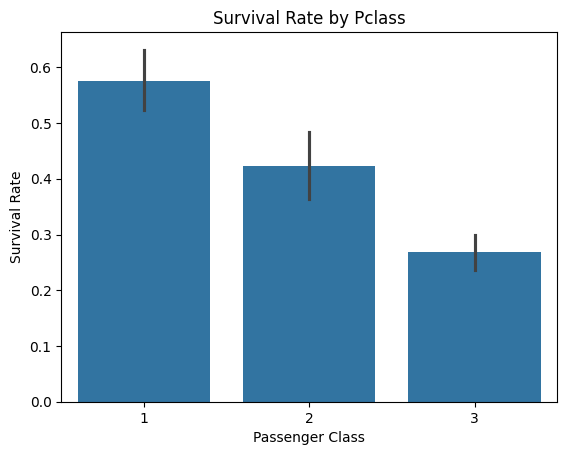

In [ ]:
# 시각화
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Pclass')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

# 생존자 vs 비생존자 비율 원형 차트

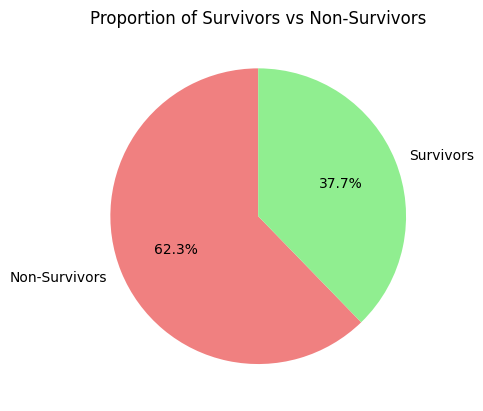

In [ ]:
# 생존자 vs 비생존자 비율 원형 차트
survival_proportions = df['Survived'].value_counts()
plt.pie(survival_proportions, labels=['Non-Survivors', 'Survivors'], autopct='%1.1f%%', colors=['lightcoral', 'lightgreen'], startangle=90)
plt.title('Proportion of Survivors vs Non-Survivors')
plt.show()

# 나이 분포 히스토그램

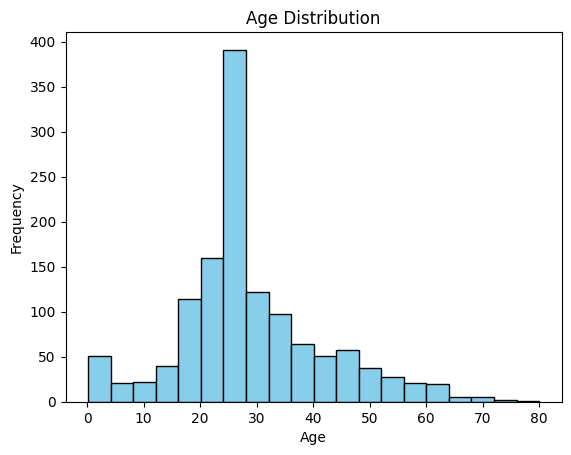

In [ ]:
# 나이 분포 히스토그램
plt.hist(df['Age'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

## 나이별 생존율

In [ ]:
# 나이를 10세 단위로 범주화
df['AgeGroup'] = pd.cut(df['Age'],
                        bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90],
                        labels=['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90'],
                        include_lowest=True)

# 나이 그룹별 생존율 계산
age_survival_rate = df.groupby('AgeGroup', observed=True)['Survived'].agg(['count', 'sum', 'mean'])
age_survival_rate['Survival Rate (%)'] = age_survival_rate['mean'] * 100
age_survival_rate = age_survival_rate[['count', 'sum', 'Survival Rate (%)']].round(2)
age_survival_rate.columns = ['Total Passengers', 'Survivors', 'Survival Rate (%)']

# 데이터프레임 표로 출력
print("\n전체 나이 그룹별 생존율:")
age_survival_rate


전체 나이 그룹별 생존율:


,Total Passengers,Survivors,Survival Rate (%)
AgeGroup,,,
0-10,86,48,55.81
10-20,162,66,40.74
20-30,624,206,33.01
30-40,210,89,42.38
40-50,132,48,36.36
50-60,62,28,45.16
60-70,27,7,25.93
70-80,6,2,33.33


### 나이별 생존율 시각화

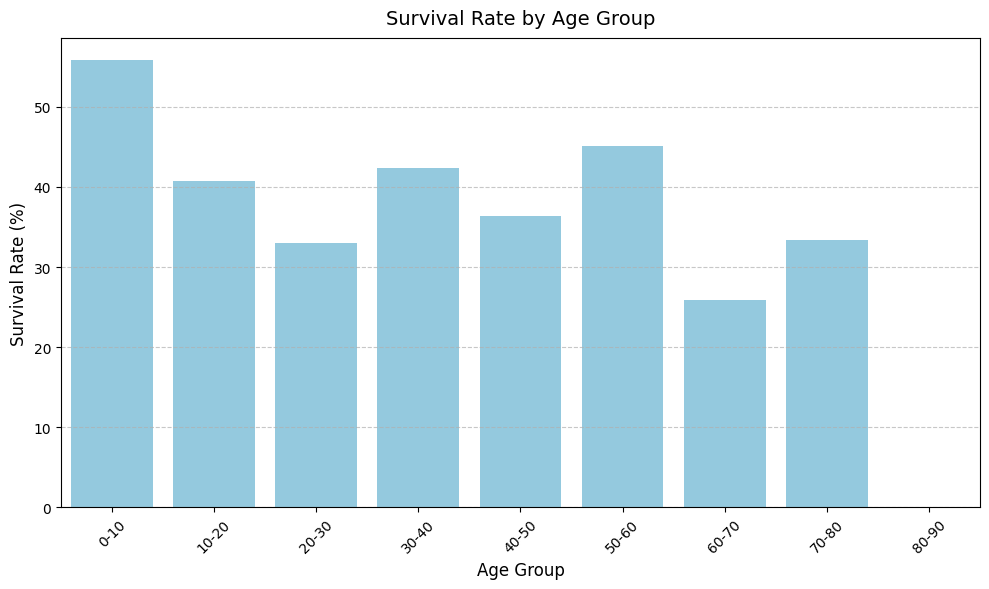

In [ ]:
# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=age_survival_rate.index, y=age_survival_rate['Survival Rate (%)'], color='skyblue')
plt.title('Survival Rate by Age Group', fontsize=14, pad=10)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Survival Rate (%)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## 성별별 생존율

In [ ]:
# 성별별 생존율 계산
survival_by_sex = df.groupby('Sex')['Survived'].mean() * 100

# 결과 출력
print("성별별 생존율 (%):")
survival_by_sex

성별별 생존율 (%):


,Survived
Sex,
female,82.618026
male,12.930012


### 성별별 생존율 시각화

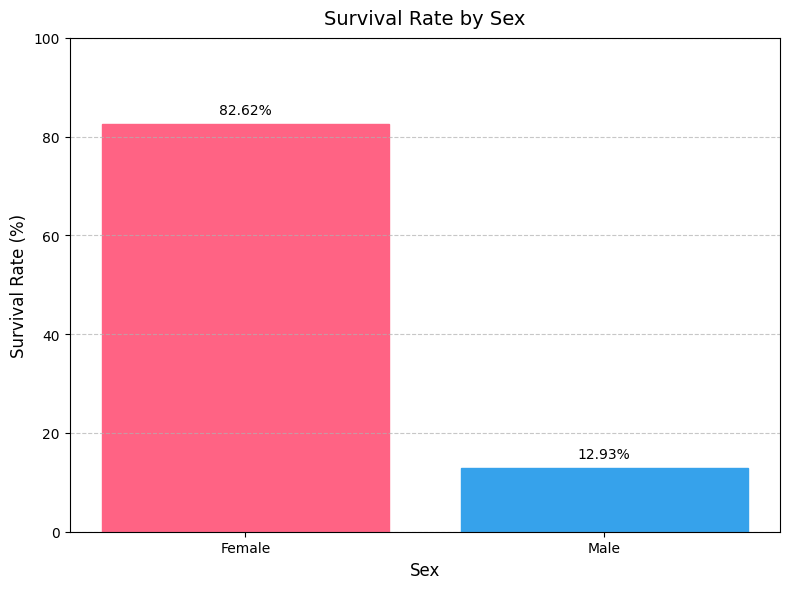

In [ ]:
# 데이터 준비
labels = ['Female', 'Male']
survival_rates = [survival_by_sex['female'], survival_by_sex['male']]
colors = ['#FF6384', '#36A2EB']  # 여성: 핑크, 남성: 파랑

# 막대 차트 생성
plt.figure(figsize=(8, 6))  # 차트 크기 (너비 8인치, 높이 6인치)
plt.bar(labels, survival_rates, color=colors, edgecolor=colors, linewidth=1)

# 차트 설정
plt.title('Survival Rate by Sex', fontsize=14, pad=10)
plt.xlabel('Sex', fontsize=12)
plt.ylabel('Survival Rate (%)', fontsize=12)
plt.ylim(0, 100)  # Y축 범위 0~100%
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Y축 그리드 추가

# 값 레이블 추가 (각 막대 위에 생존율 표시)
for i, rate in enumerate(survival_rates):
    plt.text(i, rate + 2, f'{rate:.2f}%', ha='center', fontsize=10)

# 차트 표시
plt.tight_layout()
plt.show()

# 연령대와 성별에 따른 생존율

In [ ]:
# 성별 및 연령대별 생존율 계산
sex_age_survival = df.groupby(['Sex', 'AgeGroup'], observed=True)['Survived'].mean().reset_index()
sex_age_survival['Survived'] *= 100

# 열과 행 지정
pivot_table = sex_age_survival.pivot_table(index='AgeGroup', columns='Sex', values='Survived', observed=True)

# 출력
print("연령대와 성별에 따른 생존율 (%):")
pivot_table

연령대와 성별에 따른 생존율 (%):


Sex,female,male
AgeGroup,,
0-10,70.731707,42.222222
10-20,82.352941,10.638298
20-30,81.862745,9.285714
30-40,88.000000,17.037037
40-50,78.260870,13.953488
50-60,96.000000,10.810811
60-70,100.000000,4.761905
70-80,100.000000,20.000000


## 연령대와 성별에 따른 생존율 시각화

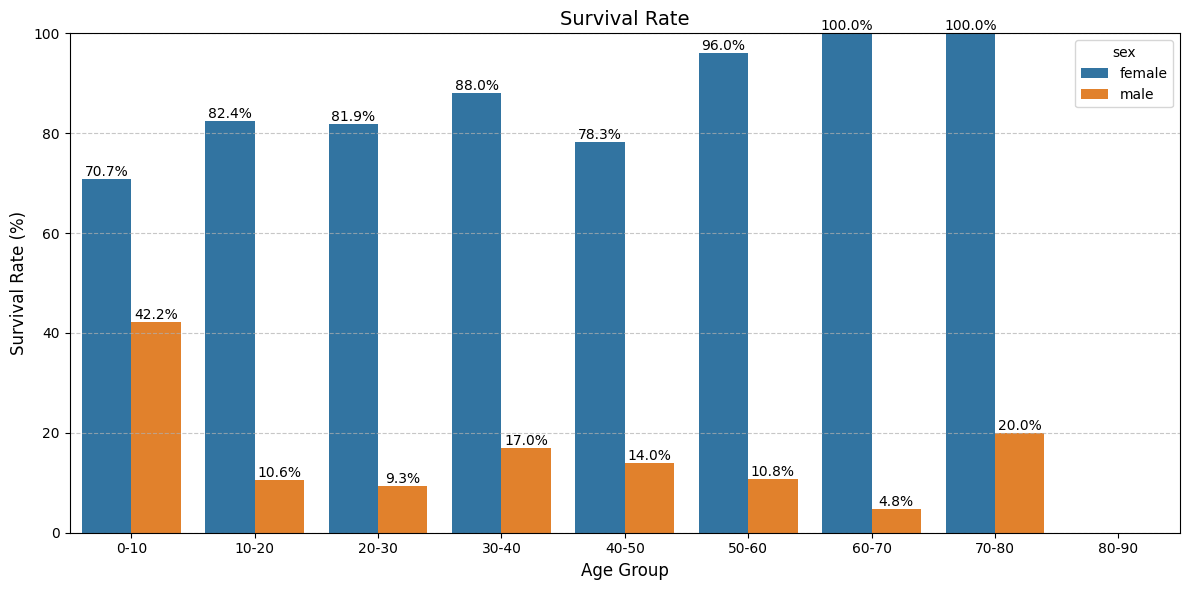

In [ ]:
# 시각화
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=sex_age_survival, x='AgeGroup', y='Survived', hue='Sex')
plt.title('Survival Rate', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Survival Rate (%)', fontsize=12)
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='sex', fontsize=10)
plt.tight_layout()

# 막대 그래프 위에 % 숫자 추가
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='edge')

plt.show()

# 탑승한 항구별 인원

In [ ]:
# 항구별 인원수 데이터프레임 생성
embarked_counts_df = df["Embarked"].value_counts().reset_index()
embarked_counts_df.columns = ["항구", "탑승 인원"]

# 결과 출력
embarked_counts_df

,항구,탑승 인원
0,S,916
1,C,270
2,Q,123


## 객실 등급에 따른 생존율 시각화

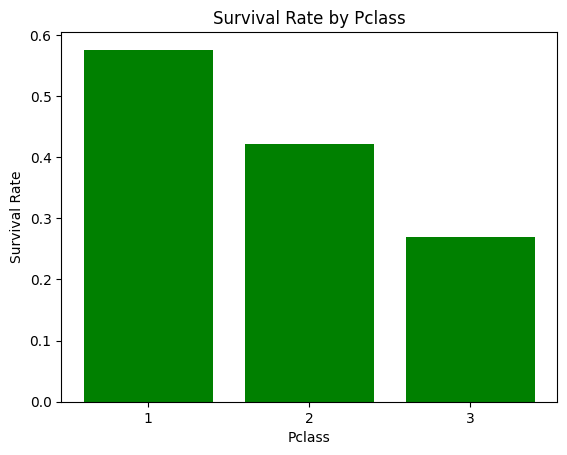

In [ ]:
# 객실 등급에 따른 생존율 막대 그래프
survival_by_pclass = df.groupby('Pclass')['Survived'].mean()
plt.bar(survival_by_pclass.index, survival_by_pclass.values, color='green')
plt.title('Survival Rate by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Survival Rate')
plt.xticks([1, 2, 3])  # 객실 등급 눈금 설정
plt.show()

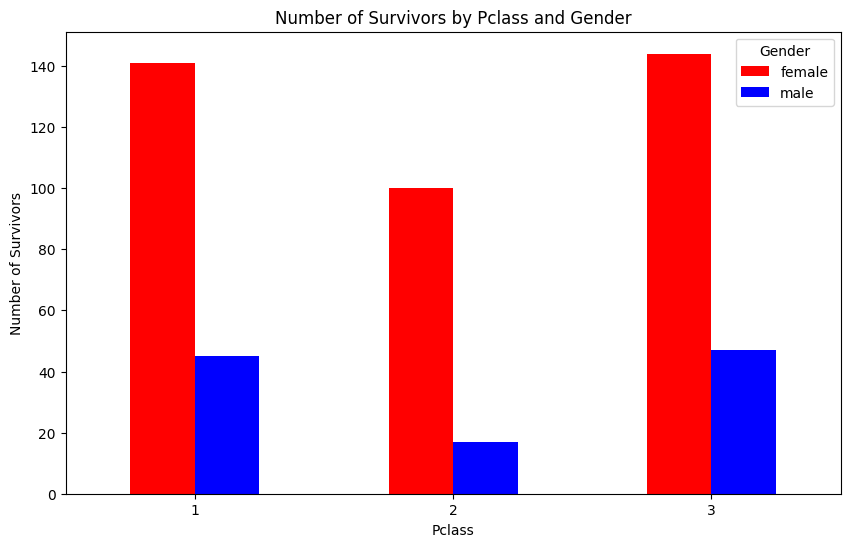

In [ ]:
# 객실 등급별 남녀 생존 숫자 그룹화된 막대 그래프

# 생존자만 필터링
survived_df = df[df['Survived'] == 1]
# 객실 등급과 성별별로 생존자 수 집계
survival_by_pclass_gender = survived_df.groupby(['Pclass', 'Sex']).size().unstack()

# 그룹화된 막대 그래프 그리기
survival_by_pclass_gender.plot(kind='bar', figsize=(10, 6), color=['red', 'blue'])
plt.title('Number of Survivors by Pclass and Gender')
plt.xlabel('Pclass')
plt.ylabel('Number of Survivors')
plt.xticks(rotation=0)  # X축 레이블 회전 없음
plt.legend(title='Gender')
plt.show()

### 탑승한 항구별 인원 시각화

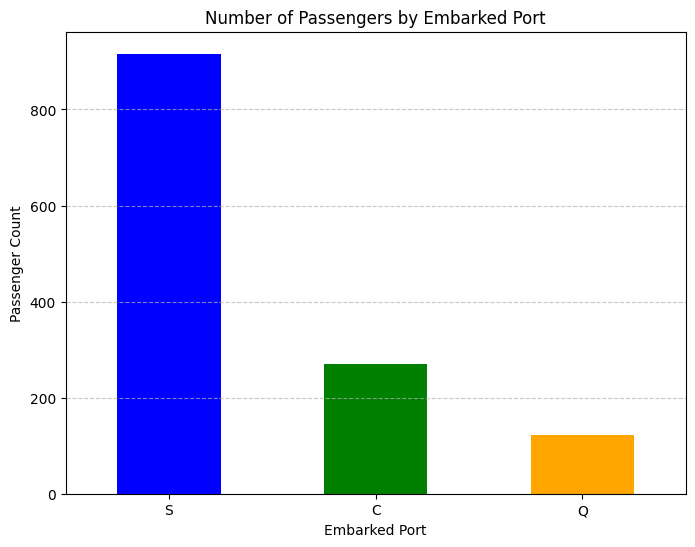

In [ ]:
# 항구별 탑승 인원 계산
embarked_counts = df['Embarked'].value_counts()

# 시각화
plt.figure(figsize=(8,6))
embarked_counts.plot(kind='bar', color=['blue', 'green', 'orange'])
plt.xlabel("Embarked Port")
plt.ylabel("Passenger Count")
plt.title("Number of Passengers by Embarked Port")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 그래프 표시
plt.show()

# 나이 vs 요금 산점도 (생존 여부로 색상 구분)

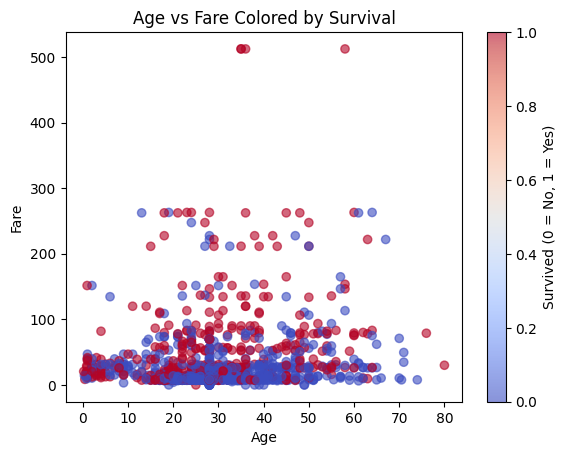

In [ ]:
# 나이 vs 요금 산점도 (생존 여부로 색상 구분)
plt.scatter(df['Age'], df['Fare'], c=df['Survived'], cmap='coolwarm', alpha=0.6)
plt.title('Age vs Fare Colored by Survival')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.colorbar(label='Survived (0 = No, 1 = Yes)')
plt.show()

# 자유 데이터

## CSV 불러오기

In [ ]:
# 1. CSV 파일 불러오기
df1 = pd.read_csv("datajo/cardata.csv")
df1.sample(3)

,월(Monthly),시도명,시군구,승용_관용,승용_자가용,승용_영업용,승용_합계,승합_관용,승합_자가용,승합_영업용,...,화물_영업용,화물_합계,특수_관용,특수_자가용,특수_영업용,특수_합계,총계_관용,총계_자가용,총계_영업용,총계_합계
8681,23-Dec,경기,수원시 권선구,131,"180,712","4,567","185,410",155,"4,787","1,549",...,"3,101","23,610",26,543,562,"1,131",474,"206,389","9,779","216,642"
10494,24-Jul,서울,마포구,94,"101,922","4,255","106,271",55,"2,516",635,...,"2,212","11,656",21,242,539,802,352,"113,942","7,641","121,935"
9759,24-Apr,경기,김포시,250,"200,963","2,493","203,706",113,"5,107","1,572",...,"4,436","35,528",8,679,700,"1,387",572,"237,640","9,201","247,413"


## 칼럼 확인

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13202 entries, 0 to 13201
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   월(Monthly)  13202 non-null  object
 1   시도명         13202 non-null  object
 2   시군구         13202 non-null  object
 3   승용_관용       13202 non-null  object
 4   승용_자가용      13202 non-null  object
 5   승용_영업용      13202 non-null  object
 6   승용_합계       13202 non-null  object
 7   승합_관용       13202 non-null  object
 8   승합_자가용      13202 non-null  object
 9   승합_영업용      13202 non-null  object
 10  승합_합계       13202 non-null  object
 11  화물_관용       13202 non-null  object
 12  화물_자가용      13202 non-null  object
 13  화물_영업용      13202 non-null  object
 14  화물_합계       13202 non-null  object
 15  특수_관용       13202 non-null  int64 
 16  특수_자가용      13202 non-null  object
 17  특수_영업용      13202 non-null  object
 18  특수_합계       13202 non-null  object
 19  총계_관용       13202 non-null  object
 20  총계_자가용

## 차량 수 비교

### 전체 비교

In [ ]:
# 쉼표 제거 및 결측치 처리 후 정수형으로 변환
for col in ['총계_합계', '승용_합계', '승합_합계', '화물_합계', '특수_합계']:
    df1[col] = df1[col].replace(',', '', regex=True).fillna(0).astype(int)

# 2021년 4월과 2025년 4월 데이터 필터링
df_2021 = df1[df1['월(Monthly)'] == '21-Apr']
df_2025 = df1[df1['월(Monthly)'] == '25-Apr']

# 각 항목별 합계 계산
summary_data = {}
for name, col in {
    '승용': '승용_합계',
    '승합': '승합_합계',
    '화물': '화물_합계',
    '특수': '특수_합계',
    '총계': '총계_합계',
}.items():
    val_2021 = df_2021[col].sum()
    val_2025 = df_2025[col].sum()
    increase = val_2025 - val_2021
    rate = round((increase / val_2021) * 100, 2)
    summary_data[name] = [val_2021, val_2025, increase, rate]

total_summary = pd.DataFrame.from_dict(
    summary_data,
    orient='index',
    columns=['2021', '2025', '증감량', '증가율(%)']
)

total_summary


,2021,2025,증감량,증가율(%)
승용,20059455,21855843,1796388,8.96
승합,771015,653134,-117881,-15.29
화물,3621531,3703646,82115,2.27
특수,110206,144916,34710,31.50
총계,24562207,26357539,1795332,7.31


전체 증가량

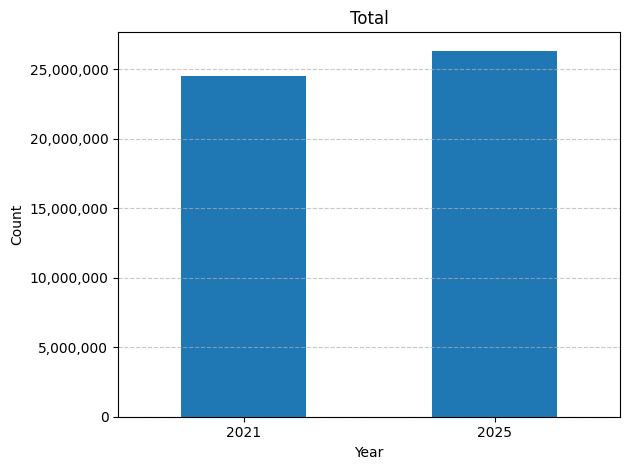

In [ ]:
total_summary.loc[['총계'], ['2021', '2025']].T.plot(kind='bar', legend=False)
plt.title('Total')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.tight_layout()
plt.show()


전체에서 각 차종의 비율

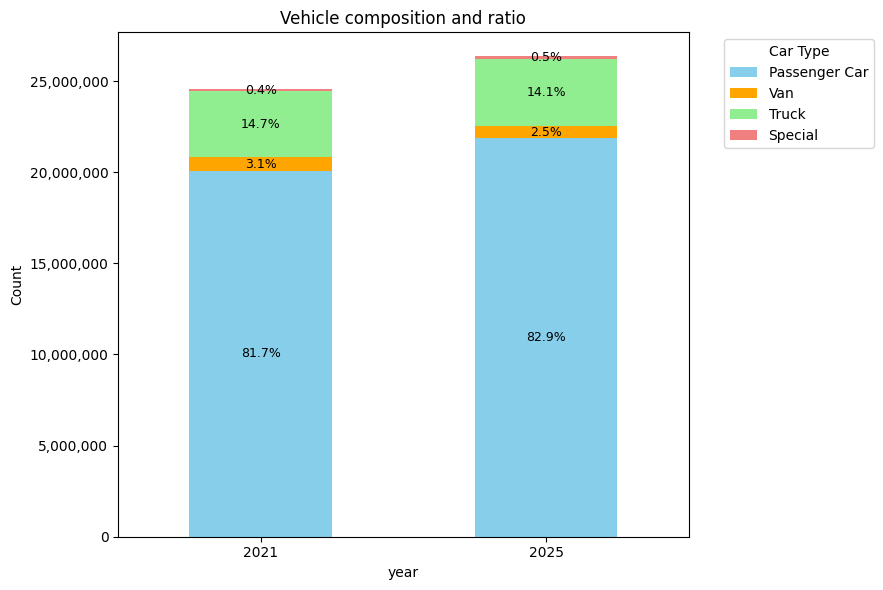

In [ ]:
#차종만 추출
stacked_df = total_summary.loc[['승용', '승합', '화물', '특수'], ['2021', '2025']]
stacked_df.index = ['Passenger Car', 'Van', 'Truck', 'Special']

#스택형 막대그래프
ax = stacked_df.T.plot(
    kind='bar',
    stacked=True,
    figsize=(9, 6),
    color=['skyblue', 'orange', 'lightgreen', 'lightcoral']
)

plt.title('Vehicle composition and ratio')
plt.xlabel('year')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.legend(title='Car Type', bbox_to_anchor=(1.05, 1), loc='upper left')

#퍼센트 라벨 추가
for idx, year in enumerate(['2021', '2025']):
    y_offset = 0
    total = total_summary.loc['총계', year]
    for vehicle in stacked_df.index:
        val = stacked_df.loc[vehicle, year]
        percent = val / total * 100
        if val > 0:
            ax.text(
                idx,
                y_offset + val / 2,
                f'{percent:.1f}%',
                ha='center',
                va='center',
                fontsize=9,
                color='black'
            )
        y_offset += val

plt.tight_layout()
plt.show()


차종별 증감량

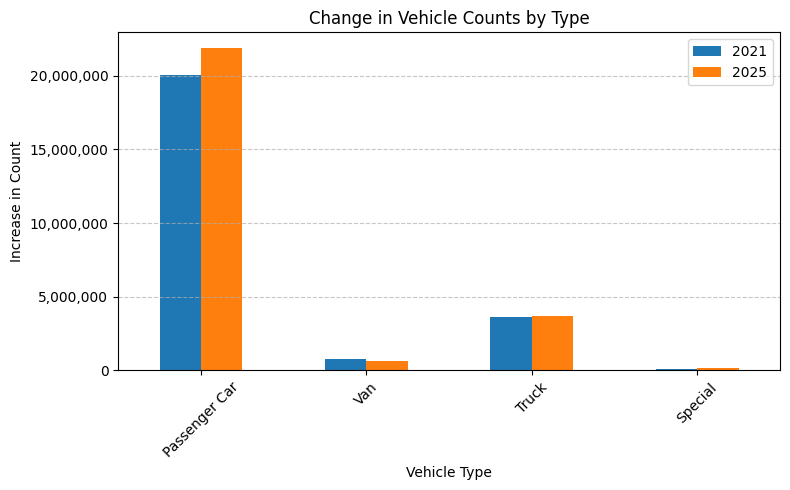

In [ ]:
# 막대그래프 그리기
stacked_df.plot(kind='bar', figsize=(8,5))
plt.title('Change in Vehicle Counts by Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Increase in Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 천 단위 콤마 표시
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.tight_layout()
plt.show()

### 시도별 비교

시도별 차량 수

In [ ]:
# 데이터 정리: 쉼표 제거 및 숫자 변환
df1['총계_합계'] = df1['총계_합계'].replace(',', '', regex=True).astype(int)

# 2021년 4월과 2025년 4월 데이터 필터링
df_2021 = df1[df1['월(Monthly)'] == '21-Apr']
df_2025 = df1[df1['월(Monthly)'] == '25-Apr']

# 지역별 승용_자가용 집계
agg_data = pd.DataFrame({
    '2021': df_2021.groupby('시도명')['총계_합계'].sum(),
    '2025': df_2025.groupby('시도명')['총계_합계'].sum()
}).reset_index()

# 증가량 계산
agg_data['증가량'] = agg_data['2025'] - agg_data['2021']

# 증가량 기준 상위 지역 정렬
agg_data = agg_data.sort_values('증가량', ascending=False)

# 데이터프레임 출력
agg_data

,시도명,2021,2025,증가량
8,Gyeonggi,6072288,6662107,589819
9,Gyeongnam,1805914,1991087,185173
13,Jeonnam,1129402,1290707,161305
0,Busan,1440236,1570642,130406
2,Chungnam,1159944,1279373,119429
11,Jeju,629896,711975,82079
1,Chungbuk,874972,951959,76987
10,Incheon,1674313,1750703,76390
7,Gyeongbuk,1487145,1556888,69743
5,Gangwon,814922,876354,61432


시도별 전체 비교

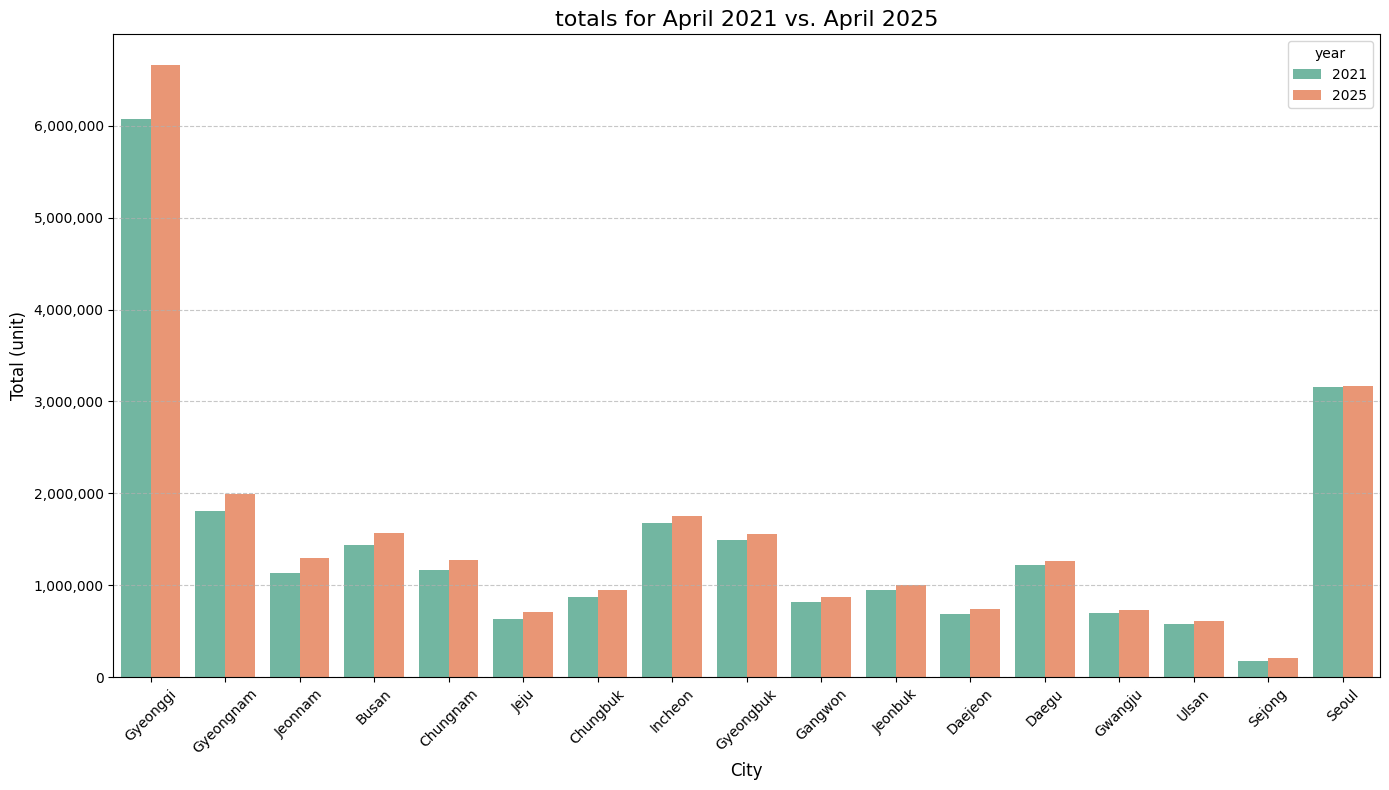

In [ ]:
df_melted = agg_data.melt(id_vars='시도명', value_vars=['2021', '2025'],
                          var_name='year', value_name='총계_합계')

# 시각화
plt.figure(figsize=(14, 8))
sns.barplot(data=df_melted, x='시도명', y='총계_합계', hue='year', palette='Set2')
plt.title('totals for April 2021 vs. April 2025', fontsize=16)
plt.xlabel('City', fontsize=12)
plt.ylabel('Total (unit)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.tight_layout()
plt.show()


시도별 증가량

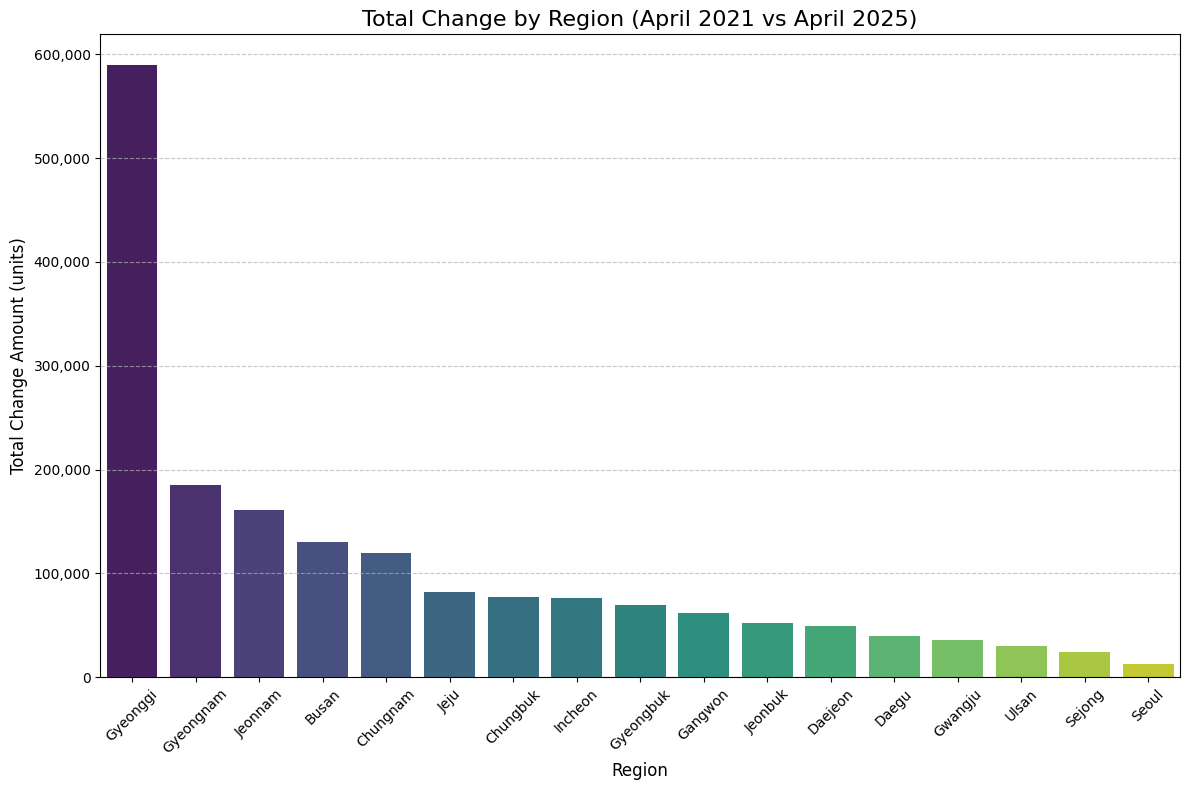

In [ ]:
# 시각화
plt.figure(figsize=(12, 8))
sns.barplot(x=agg_data['시도명'], y=agg_data['증가량'], hue=agg_data['시도명'],
            palette='viridis', legend=False)
plt.title('Total Change by Region (April 2021 vs April 2025)', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Total Change Amount (units)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.tight_layout()
plt.show()

## 관용

### 승용_관용

In [ ]:
# 데이터 정리: 쉼표 제거 및 숫자 변환
df1['승용_관용'] = df1['승용_관용'].replace(',', '', regex=True).astype(int)

# 2021년 4월과 2025년 4월 데이터 필터링
df_2021 = df1[df1['월(Monthly)'] == '21-Apr']
df_2025 = df1[df1['월(Monthly)'] == '25-Apr']

# 지역별 승용_관용 집계
agg_data = pd.DataFrame({
    '2021': df_2021.groupby('시도명')['승용_관용'].sum(),
    '2025': df_2025.groupby('시도명')['승용_관용'].sum()
}).reset_index()

# 증가량 계산
agg_data['증가량'] = agg_data['2025'] - agg_data['2021']

# 증가량 기준 상위 지역 정렬
agg_data = agg_data.sort_values('증가량', ascending=False)

# 데이터프레임 출력
print("\n승용_관용 증가량 데이터프레임 (상위 10개 지역):")
agg_data.head(10)


승용_관용 증가량 데이터프레임 (상위 10개 지역):


,시도명,2021,2025,증가량
1,경기,14570,16658,2088
8,서울,8908,9608,700
7,부산,3270,3844,574
12,전남,4290,4816,526
11,인천,3016,3530,514
2,경남,4904,5366,462
0,강원,3648,4104,456
13,전북,3534,3980,446
15,충남,3848,4238,390
3,경북,5150,5518,368


### 승합_관용

In [ ]:
# 데이터 정리: 쉼표 제거 및 숫자 변환
df1['승합_관용'] = df1['승합_관용'].replace(',', '', regex=True).astype(int)

# 2021년 4월과 2025년 4월 데이터 필터링
df_2021 = df1[df1['월(Monthly)'] == '21-Apr']
df_2025 = df1[df1['월(Monthly)'] == '25-Apr']

# 지역별 승합_관용 집계
agg_data = pd.DataFrame({
    '2021': df_2021.groupby('시도명')['승합_관용'].sum(),
    '2025': df_2025.groupby('시도명')['승합_관용'].sum()
}).reset_index()

# 증가량 계산
agg_data['증가량'] = agg_data['2025'] - agg_data['2021']

# 증가량 기준 상위 지역 정렬
agg_data = agg_data.sort_values('증가량', ascending=False)

# 데이터프레임 출력
print("\n승합_관용 증가량 데이터프레임 (상위 10개 지역):")
agg_data.head(10)


승합_관용 증가량 데이터프레임 (상위 10개 지역):


,시도명,2021,2025,증가량
5,대구,1770,2046,276
11,인천,2112,2366,254
0,강원,3156,3386,230
16,충북,2034,2258,224
12,전남,3166,3368,202
10,울산,894,1036,142
9,세종,366,498,132
13,전북,2638,2766,128
15,충남,2458,2586,128
7,부산,2520,2562,42


### 화물_관용

In [ ]:
# 데이터 정리: 쉼표 제거 및 숫자 변환
df1['화물_관용'] = df1['화물_관용'].replace(',', '', regex=True).astype(int)

# 2021년 4월과 2025년 4월 데이터 필터링
df_2021 = df1[df1['월(Monthly)'] == '21-Apr']
df_2025 = df1[df1['월(Monthly)'] == '25-Apr']

# 지역별 화물_관용 집계
agg_data = pd.DataFrame({
    '2021': df_2021.groupby('시도명')['화물_관용'].sum(),
    '2025': df_2025.groupby('시도명')['화물_관용'].sum()
}).reset_index()

# 증가량 계산
agg_data['증가량'] = agg_data['2025'] - agg_data['2021']

# 증가량 기준 상위 지역 정렬
agg_data = agg_data.sort_values('증가량', ascending=False)

# 데이터프레임 출력
print("\n화물_관용 증가량 데이터프레임 (상위 10개 지역):")
agg_data.head(10)


화물_관용 증가량 데이터프레임 (상위 10개 지역):


,시도명,2021,2025,증가량
12,전남,4874,5508,634
6,대전,1274,1818,544
0,강원,4962,5450,488
13,전북,4158,4638,480
1,경기,11156,11566,410
2,경남,5190,5550,360
15,충남,4716,5000,284
4,광주,1414,1680,266
3,경북,5888,6152,264
5,대구,2704,2926,222


### 특수_관용

In [ ]:
# 데이터 정리: 쉼표 제거 및 숫자 변환
df1['특수_관용'] = df1['특수_관용'].replace(',', '', regex=True).astype(int)

# 2021년 4월과 2025년 4월 데이터 필터링
df_2021 = df1[df1['월(Monthly)'] == '21-Apr']
df_2025 = df1[df1['월(Monthly)'] == '25-Apr']

# 지역별 특수_관용 집계
agg_data = pd.DataFrame({
    '2021': df_2021.groupby('시도명')['특수_관용'].sum(),
    '2025': df_2025.groupby('시도명')['특수_관용'].sum()
}).reset_index()

# 증가량 계산
agg_data['증가량'] = agg_data['2025'] - agg_data['2021']

# 증가량 기준 상위 지역 정렬
agg_data = agg_data.sort_values('증가량', ascending=False)

# 데이터프레임 출력
print("\n특수_관용 증가량 데이터프레임 (상위 10개 지역):")
agg_data.head(10)


특수_관용 증가량 데이터프레임 (상위 10개 지역):


,시도명,2021,2025,증가량
3,경북,500,802,302
2,경남,400,672,272
0,강원,368,574,206
1,경기,1114,1268,154
8,서울,736,862,126
12,전남,366,486,120
15,충남,544,662,118
16,충북,238,336,98
13,전북,328,420,92
5,대구,240,322,82


### 총계_관용

In [ ]:
# 데이터 정리: 쉼표 제거 및 숫자 변환
df1['총계_관용'] = df1['총계_관용'].replace(',', '', regex=True).astype(int)

# 2021년 4월과 2025년 4월 데이터 필터링
df_2021 = df1[df1['월(Monthly)'] == '21-Apr']
df_2025 = df1[df1['월(Monthly)'] == '25-Apr']

# 지역별 총계_관용 집계
agg_data = pd.DataFrame({
    '2021': df_2021.groupby('시도명')['총계_관용'].sum(),
    '2025': df_2025.groupby('시도명')['총계_관용'].sum()
}).reset_index()

# 증가량 계산
agg_data['증가량'] = agg_data['2025'] - agg_data['2021']

# 증가량 기준 상위 지역 정렬
agg_data = agg_data.sort_values('증가량', ascending=False)

# 데이터프레임 출력
print("\n총계_관용 증가량 데이터프레임 (상위 10개 지역):")
agg_data.head(10)


총계_관용 증가량 데이터프레임 (상위 10개 지역):


,시도명,2021,2025,증가량
1,경기,35262,37928,2666
12,전남,12696,14178,1482
0,강원,12134,13514,1380
13,전북,10658,11804,1146
2,경남,14294,15388,1094
15,충남,11566,12486,920
11,인천,8002,8908,906
3,경북,15080,15986,906
5,대구,6650,7514,864
8,서울,24842,25700,858


## 자가용

### 승용_자가용

In [ ]:
# 데이터 정리: 쉼표 제거 및 숫자 변환
df1['승용_자가용'] = df1['승용_자가용'].replace(',', '', regex=True).astype(int)

# 2021년 4월과 2025년 4월 데이터 필터링
df_2021 = df1[df1['월(Monthly)'] == '21-Apr']
df_2025 = df1[df1['월(Monthly)'] == '25-Apr']

# 지역별 승용_자가용 집계
agg_data = pd.DataFrame({
    '2021': df_2021.groupby('시도명')['승용_자가용'].sum(),
    '2025': df_2025.groupby('시도명')['승용_자가용'].sum()
}).reset_index()

# 증가량 계산
agg_data['증가량'] = agg_data['2025'] - agg_data['2021']

# 증가량 기준 상위 지역 정렬
agg_data = agg_data.sort_values('증가량', ascending=False)

# 데이터프레임 출력
print("\n승용_자가용 증가량 데이터프레임 (상위 10개 지역):")
agg_data.head(10)


승용_자가용 증가량 데이터프레임 (상위 10개 지역):


,시도명,2021,2025,증가량
1,경기,9909280,11028690,1119410
11,인천,2260668,2555048,294380
2,경남,2732088,3019416,287328
15,충남,1747512,1965734,218222
7,부산,2225028,2385348,160320
12,전남,1392370,1540816,148446
16,충북,1331604,1472690,141086
3,경북,2188478,2327866,139388
8,서울,5178048,5315370,137322
0,강원,1218870,1334694,115824


### 승합_자가용


In [ ]:
# 데이터 정리: 쉼표 제거 및 숫자 변환
df1['승합_자가용'] = df1['승합_자가용'].replace(',', '', regex=True).astype(int)

# 2021년 4월과 2025년 4월 데이터 필터링
df_2021 = df1[df1['월(Monthly)'] == '21-Apr']
df_2025 = df1[df1['월(Monthly)'] == '25-Apr']

# 지역별 승합_자가용 집계
agg_data = pd.DataFrame({
    '2021': df_2021.groupby('시도명')['승합_자가용'].sum(),
    '2025': df_2025.groupby('시도명')['승합_자가용'].sum()
}).reset_index()

# 증가량 계산
agg_data['증가량'] = agg_data['2021'] - agg_data['2025']

# 증가량 기준 상위 지역 정렬
agg_data = agg_data.sort_values('증가량', ascending=False)

# 데이터프레임 출력
print("\n승합_자가용 증가량 데이터프레임 (상위 10개 지역):")
agg_data.head(10)


승합_자가용 증가량 데이터프레임 (상위 10개 지역):


,시도명,2021,2025,증가량
1,경기,330498,268830,61668
8,서울,170366,130902,39464
2,경남,86890,72266,14624
11,인천,72294,58062,14232
7,부산,67848,54382,13466
3,경북,81048,69714,11334
15,충남,68532,58602,9930
5,대구,50476,41946,8530
0,강원,47160,38658,8502
13,전북,53472,45106,8366


### 화물_자가용


In [ ]:
# 데이터 정리: 쉼표 제거 및 숫자 변환
df1['화물_자가용'] = df1['화물_자가용'].replace(',', '', regex=True).astype(int)

# 2021년 4월과 2025년 4월 데이터 필터링
df_2021 = df1[df1['월(Monthly)'] == '21-Apr']
df_2025 = df1[df1['월(Monthly)'] == '25-Apr']

# 지역별 화물_자가용 집계
agg_data = pd.DataFrame({
    '2021': df_2021.groupby('시도명')['화물_자가용'].sum(),
    '2025': df_2025.groupby('시도명')['화물_자가용'].sum()
}).reset_index()

# 증가량 계산
agg_data['증가량'] = agg_data['2025']- agg_data['2021']

# 증가량 기준 상위 지역 정렬
agg_data = agg_data.sort_values('증가량', ascending=False)

# 데이터프레임 출력
print("\n화물_자가용 증가량 데이터프레임 (상위 10개 지역):")
agg_data.head(10)


화물_자가용 증가량 데이터프레임 (상위 10개 지역):


,시도명,2021,2025,증가량
1,경기,1383308,1424264,40956
15,충남,407674,428990,21316
12,전남,447038,467966,20928
14,제주,153988,171708,17720
16,충북,285042,296248,11206
13,전북,340052,350560,10508
0,강원,297584,306572,8988
2,경남,529284,537612,8328
3,경북,586536,592104,5568
11,인천,321842,326470,4628


### 특수_자가용


In [ ]:
# 데이터 정리: 쉼표 제거 및 숫자 변환
df1['특수_자가용'] = df1['특수_자가용'].replace(',', '', regex=True).astype(int)

# 2021년 4월과 2025년 4월 데이터 필터링
df_2021 = df1[df1['월(Monthly)'] == '21-Apr']
df_2025 = df1[df1['월(Monthly)'] == '25-Apr']

# 지역별 총계_자가용 집계
agg_data = pd.DataFrame({
    '2021': df_2021.groupby('시도명')['특수_자가용'].sum(),
    '2025': df_2025.groupby('시도명')['특수_자가용'].sum()
}).reset_index()

# 증가량 계산
agg_data['증가량'] = agg_data['2025']- agg_data['2021']

# 증가량 기준 상위 지역 정렬
agg_data = agg_data.sort_values('증가량', ascending=False)

# 데이터프레임 출력
print("\n특수_자가용 증가량 데이터프레임 (상위 10개 지역):")
agg_data.head(10)


특수_자가용 증가량 데이터프레임 (상위 10개 지역):


,시도명,2021,2025,증가량
1,경기,21460,37752,16292
8,서울,7684,12162,4478
3,경북,6390,10514,4124
15,충남,4988,9062,4074
2,경남,6510,10574,4064
11,인천,4788,8444,3656
16,충북,3862,7202,3340
0,강원,3782,6658,2876
12,전남,5452,8298,2846
5,대구,3278,6014,2736


### 총계_자가용


In [ ]:
# 데이터 정리: 쉼표 제거 및 숫자 변환
df1['총계_자가용'] = df1['총계_자가용'].replace(',', '', regex=True).astype(int)

# 2021년 4월과 2025년 4월 데이터 필터링
df_2021 = df1[df1['월(Monthly)'] == '21-Apr']
df_2025 = df1[df1['월(Monthly)'] == '25-Apr']

# 지역별 총계_자가용 집계
agg_data = pd.DataFrame({
    '2021': df_2021.groupby('시도명')['총계_자가용'].sum(),
    '2025': df_2025.groupby('시도명')['총계_자가용'].sum()
}).reset_index()

# 증가량 계산
agg_data['증가량'] = agg_data['2025']- agg_data['2021']

# 증가량 기준 상위 지역 정렬
agg_data = agg_data.sort_values('증가량', ascending=False)

# 데이터프레임 출력
print("\n총계_자가용 증가량 데이터프레임 (상위 10개 지역):")
agg_data.head(10)


총계_자가용 증가량 데이터프레임 (상위 10개 지역):


,시도명,2021,2025,증가량
1,경기,11644546,12759536,1114990
11,인천,2659592,2948024,288432
2,경남,3354772,3639868,285096
15,충남,2228706,2462388,233682
12,전남,1903886,2068052,164166
16,충북,1669072,1817640,148568
3,경북,2862452,3000198,137746
7,부산,2599056,2736338,137282
0,강원,1567396,1686582,119186
13,전북,1817430,1926442,109012


## 영업용

### 승용_영업용


In [ ]:
# 데이터 정리: 쉼표 제거 및 숫자 변환
df1['승용_영업용'] = df1['승용_영업용'].replace(',', '', regex=True).astype(int)

# 2021년 4월과 2025년 4월 데이터 필터링
df_2021 = df1[df1['월(Monthly)'] == '21-Apr']
df_2025 = df1[df1['월(Monthly)'] == '25-Apr']

# 지역별 승용_영업용 집계
agg_data = pd.DataFrame({
    '2021': df_2021.groupby('시도명')['승용_영업용'].sum(),
    '2025': df_2025.groupby('시도명')['승용_영업용'].sum()
}).reset_index()

# 증가량 계산
agg_data['증가량'] = agg_data['2025']- agg_data['2021']

# 증가량 기준 상위 지역 정렬
agg_data = agg_data.sort_values('증가량', ascending=False)

# 데이터프레임 출력
print("\n승용_영업용 증가량 데이터프레임 (상위 10개 지역):")
agg_data.head(10)


승용_영업용 증가량 데이터프레임 (상위 10개 지역):


,시도명,2021,2025,증가량
12,전남,276380,431188,154808
7,부산,174458,291750,117292
2,경남,166692,245966,79274
14,제주,462074,540728,78654
6,대전,28294,66158,37864
1,경기,140492,161226,20734
5,대구,51590,62504,10914
9,세종,1308,2420,1112
16,충북,30712,31306,594
0,강원,23390,23952,562


### 승합_영업용


In [ ]:
# 데이터 정리: 쉼표 제거 및 숫자 변환
df1['승합_영업용'] = df1['승합_영업용'].replace(',', '', regex=True).astype(int)

# 2021년 4월과 2025년 4월 데이터 필터링
df_2021 = df1[df1['월(Monthly)'] == '21-Apr']
df_2025 = df1[df1['월(Monthly)'] == '25-Apr']

# 지역별 승합_영업용 집계
agg_data = pd.DataFrame({
    '2021': df_2021.groupby('시도명')['승합_영업용'].sum(),
    '2025': df_2025.groupby('시도명')['승합_영업용'].sum()
}).reset_index()

# 증가량 계산
agg_data['증가량'] = agg_data['2021'] - agg_data['2025']

# 증가량 기준 상위 지역 정렬
agg_data = agg_data.sort_values('증가량', ascending=False)

# 데이터프레임 출력
print("\n승합_영업용 증가량 데이터프레임 (상위 10개 지역):")
agg_data.head(10)


승합_영업용 증가량 데이터프레임 (상위 10개 지역):


,시도명,2021,2025,증가량
11,인천,21202,14756,6446
8,서울,30460,29124,1336
14,제주,13920,12682,1238
2,경남,14738,13990,748
13,전북,8236,7788,448
3,경북,10690,10370,320
15,충남,10694,10398,296
0,강원,6210,5952,258
4,광주,4728,4564,164
12,전남,15364,15230,134


### 화물_영업용


In [ ]:
# 데이터 정리: 쉼표 제거 및 숫자 변환
df1['화물_영업용'] = df1['화물_영업용'].replace(',', '', regex=True).astype(int)

# 2021년 4월과 2025년 4월 데이터 필터링
df_2021 = df1[df1['월(Monthly)'] == '21-Apr']
df_2025 = df1[df1['월(Monthly)'] == '25-Apr']

# 지역별 화물_영업용 집계
agg_data = pd.DataFrame({
    '2021': df_2021.groupby('시도명')['화물_영업용'].sum(),
    '2025': df_2025.groupby('시도명')['화물_영업용'].sum()
}).reset_index()

# 증가량 계산
agg_data['증가량'] = agg_data['2025'] - agg_data['2021']

# 증가량 기준 상위 지역 정렬
agg_data = agg_data.sort_values('증가량', ascending=False)

# 데이터프레임 출력
print("\n화물_영업용 증가량 데이터프레임 (상위 10개 지역):")
agg_data.head(10)


화물_영업용 증가량 데이터프레임 (상위 10개 지역):


,시도명,2021,2025,증가량
1,경기,237346,276042,38696
11,인천,63538,71104,7566
2,경남,50292,55470,5178
7,부산,67812,72508,4696
15,충남,36074,39776,3702
16,충북,29070,32556,3486
5,대구,38618,41512,2894
8,서울,116328,118778,2450
4,광주,27092,29466,2374
13,전북,30824,33122,2298


### 특수_영업용


In [ ]:
# 데이터 정리: 쉼표 제거 및 숫자 변환
df1['특수_영업용'] = df1['특수_영업용'].replace(',', '', regex=True).astype(int)

# 2021년 4월과 2025년 4월 데이터 필터링
df_2021 = df1[df1['월(Monthly)'] == '21-Apr']
df_2025 = df1[df1['월(Monthly)'] == '25-Apr']

# 지역별 특수_영업용 집계
agg_data = pd.DataFrame({
    '2021': df_2021.groupby('시도명')['특수_영업용'].sum(),
    '2025': df_2025.groupby('시도명')['특수_영업용'].sum()
}).reset_index()

# 증가량 계산
agg_data['증가량'] = agg_data['2025'] - agg_data['2021']

# 증가량 기준 상위 지역 정렬
agg_data = agg_data.sort_values('증가량', ascending=False)

# 데이터프레임 출력
print("\n특수_영업용 증가량 데이터프레임 (상위 10개 지역):")
agg_data.head(10)


특수_영업용 증가량 데이터프레임 (상위 10개 지역):


,시도명,2021,2025,증가량
1,경기,22866,24790,1924
13,전북,4492,5172,680
3,경북,10186,10832,646
15,충남,6036,6608,572
12,전남,9852,10404,552
2,경남,11040,11492,452
0,강원,3526,3960,434
16,충북,5554,5878,324
8,서울,9980,10292,312
4,광주,3658,3920,262


### 총계_영업용


In [ ]:
# 데이터 정리: 쉼표 제거 및 숫자 변환
df1['총계_영업용'] = df1['총계_영업용'].replace(',', '', regex=True).astype(int)

# 2021년 4월과 2025년 4월 데이터 필터링
df_2021 = df1[df1['월(Monthly)'] == '21-Apr']
df_2025 = df1[df1['월(Monthly)'] == '25-Apr']

# 지역별 총계_영업용 집계
agg_data = pd.DataFrame({
    '2021': df_2021.groupby('시도명')['총계_영업용'].sum(),
    '2025': df_2025.groupby('시도명')['총계_영업용'].sum()
}).reset_index()

# 증가량 계산
agg_data['증가량'] = agg_data['2025'] - agg_data['2021']

# 증가량 기준 상위 지역 정렬
agg_data = agg_data.sort_values('증가량', ascending=False)

# 데이터프레임 출력
print("\n총계_영업용 증가량 데이터프레임 (상위 10개 지역):")
agg_data.head(10)


총계_영업용 증가량 데이터프레임 (상위 10개 지역):


,시도명,2021,2025,증가량
12,전남,342222,499184,156962
7,부산,272162,395006,122844
2,경남,242762,326918,84156
14,제주,484650,563584,78934
1,경기,464768,526750,61982
6,대전,59232,99120,39888
5,대구,102318,116300,13982
16,충북,72802,77362,4560
15,충남,79616,83872,4256
0,강원,50314,52612,2298


## 합계

### 승용_합계


In [ ]:
# 데이터 정리: 쉼표 제거 및 숫자 변환
df1['승용_합계'] = df1['승용_합계'].replace(',', '', regex=True).astype(int)

# 2021년 4월과 2025년 4월 데이터 필터링
df_2021 = df1[df1['월(Monthly)'] == '21-Apr']
df_2025 = df1[df1['월(Monthly)'] == '25-Apr']

# 지역별 승용_합계 집계
agg_data = pd.DataFrame({
    '2021': df_2021.groupby('시도명')['승용_합계'].sum(),
    '2025': df_2025.groupby('시도명')['승용_합계'].sum()
}).reset_index()

# 증가량 계산
agg_data['증가량'] = agg_data['2025'] - agg_data['2021']

# 증가량 기준 상위 지역 정렬
agg_data = agg_data.sort_values('증가량', ascending=False)

# 데이터프레임 출력
print("\n승용_합계 증가량 데이터프레임 (상위 10개 지역):")
agg_data.head(10)


승용_합계 증가량 데이터프레임 (상위 10개 지역):


,시도명,2021,2025,증가량
1,경기,10064342,11206574,1142232
2,경남,2903684,3270748,367064
12,전남,1673040,1976820,303780
7,부산,2402756,2680942,278186
15,충남,1778172,1997062,218890
11,인천,2849282,3006396,157114
14,제주,1056440,1204076,147636
16,충북,1365006,1506992,141986
3,경북,2220946,2359808,138862
0,강원,1245908,1362750,116842


### 승합_합계


In [ ]:
# 데이터 정리: 쉼표 제거 및 숫자 변환
df1['승합_합계'] = df1['승합_합계'].replace(',', '', regex=True).astype(int)

# 2021년 4월과 2025년 4월 데이터 필터링
df_2021 = df1[df1['월(Monthly)'] == '21-Apr']
df_2025 = df1[df1['월(Monthly)'] == '25-Apr']

# 지역별 승합_합계 집계
agg_data = pd.DataFrame({
    '2021': df_2021.groupby('시도명')['승합_합계'].sum(),
    '2025': df_2025.groupby('시도명')['승합_합계'].sum()
}).reset_index()

# 증가량 계산
agg_data['증가량'] = agg_data['2021'] - agg_data['2025']

# 증가량 기준 상위 지역 정렬
agg_data = agg_data.sort_values('증가량', ascending=False)

# 데이터프레임 출력
print("\n승합_합계 증가량 데이터프레임 (상위 10개 지역):")
agg_data.head(10)


승합_합계 증가량 데이터프레임 (상위 10개 지역):


,시도명,2021,2025,증가량
1,경기,402984,341958,61026
8,서울,208202,167428,40774
11,인천,95608,75184,20424
2,경남,105428,90056,15372
7,부산,82414,69594,12820
3,경북,95280,83598,11682
15,충남,81684,71586,10098
13,전북,64346,55660,8686
0,강원,56526,47996,8530
5,대구,60138,51800,8338


### 화물_합계


In [ ]:
# 데이터 정리: 쉼표 제거 및 숫자 변환
df1['화물_합계'] = df1['화물_합계'].replace(',', '', regex=True).astype(int)

# 2021년 4월과 2025년 4월 데이터 필터링
df_2021 = df1[df1['월(Monthly)'] == '21-Apr']
df_2025 = df1[df1['월(Monthly)'] == '25-Apr']

# 지역별 화물_합계 집계
agg_data = pd.DataFrame({
    '2021': df_2021.groupby('시도명')['화물_합계'].sum(),
    '2025': df_2025.groupby('시도명')['화물_합계'].sum()
}).reset_index()

# 증가량 계산
agg_data['증가량'] = agg_data['2025'] - agg_data['2021']

# 증가량 기준 상위 지역 정렬
agg_data = agg_data.sort_values('증가량', ascending=False)

# 데이터프레임 출력
print("\n화물_합계 증가량 데이터프레임 (상위 10개 지역):")
agg_data.head(10)


화물_합계 증가량 데이터프레임 (상위 10개 지역):


,시도명,2021,2025,증가량
1,경기,1631810,1711872,80062
15,충남,448464,473766,25302
12,전남,492538,515836,23298
14,제주,163430,182536,19106
16,충북,317220,332130,14910
2,경남,584766,598632,13866
13,전북,375034,388320,13286
11,인천,388022,400294,12272
0,강원,319734,330770,11036
3,경북,640988,648222,7234


### 특수_합계


In [ ]:
# 데이터 정리: 쉼표 제거 및 숫자 변환
df1['특수_합계'] = df1['특수_합계'].replace(',', '', regex=True).astype(int)

# 2021년 4월과 2025년 4월 데이터 필터링
df_2021 = df1[df1['월(Monthly)'] == '21-Apr']
df_2025 = df1[df1['월(Monthly)'] == '25-Apr']

# 지역별 특수_합계 집계
agg_data = pd.DataFrame({
    '2021': df_2021.groupby('시도명')['특수_합계'].sum(),
    '2025': df_2025.groupby('시도명')['특수_합계'].sum()
}).reset_index()

# 증가량 계산
agg_data['증가량'] = agg_data['2025'] - agg_data['2021']

# 증가량 기준 상위 지역 정렬
agg_data = agg_data.sort_values('증가량', ascending=False)

# 데이터프레임 출력
print("\n특수_합계 증가량 데이터프레임 (상위 10개 지역):")
agg_data.head(10)


특수_합계 증가량 데이터프레임 (상위 10개 지역):


,시도명,2021,2025,증가량
1,경기,45440,63810,18370
3,경북,17076,22148,5072
8,서울,18400,23316,4916
2,경남,17950,22738,4788
15,충남,11568,16332,4764
11,인천,15714,19532,3818
16,충북,9654,13416,3762
12,전남,15670,19188,3518
0,강원,7676,11192,3516
13,전북,8834,12256,3422


### 총계_합계


In [ ]:
# 데이터 정리: 쉼표 제거 및 숫자 변환
df1['총계_합계'] = df1['총계_합계'].replace(',', '', regex=True).astype(int)

# 2021년 4월과 2025년 4월 데이터 필터링
df_2021 = df1[df1['월(Monthly)'] == '21-Apr']
df_2025 = df1[df1['월(Monthly)'] == '25-Apr']

# 지역별 총계_합계 집계
agg_data = pd.DataFrame({
    '2021': df_2021.groupby('시도명')['총계_합계'].sum(),
    '2025': df_2025.groupby('시도명')['총계_합계'].sum()
}).reset_index()

# 증가량 계산
agg_data['증가량'] = agg_data['2025'] - agg_data['2021']

# 증가량 기준 상위 지역 정렬
agg_data = agg_data.sort_values('증가량', ascending=False)

# 데이터프레임 출력
print("\n총계_합계 증가량 데이터프레임 (상위 10개 지역):")
agg_data.head(10)


총계_합계 증가량 데이터프레임 (상위 10개 지역):


,시도명,2021,2025,증가량
1,경기,12144576,13324214,1179638
2,경남,3611828,3982174,370346
12,전남,2258804,2581414,322610
7,부산,2880472,3141284,260812
15,충남,2319888,2558746,238858
14,제주,1259792,1423950,164158
16,충북,1749944,1903918,153974
11,인천,3348626,3501406,152780
3,경북,2974290,3113776,139486
0,강원,1629844,1752708,122864
